In [1]:
import numpy as np
from itertools import islice
import pandas as pd
import pickle
import csv
import matplotlib.pyplot as plt
import seaborn as sns

from isttc.scripts.cfg_global import project_folder_path
from isttc.acfunc import acf_sttc, acf_pearsonr_trial_avg, acf_sttc_trial_avg, acf_sttc_trial_concat
from isttc.tau import fit_single_exp, fit_single_exp_2d, func_single_exp_monkey
from isttc.spike_utils import bin_spike_train_fixed_len, get_trials, bin_trials

In [2]:
dataset_folder = project_folder_path + 'results\\allen_mice\\dataset\\cut_30min\\'

In [3]:
csv_data_file = dataset_folder + 'sua_list_constrained.csv'
print(f'Loading file {csv_data_file}')
with open(csv_data_file, newline='') as f:
    reader = csv.reader(f)
    sua_list = list(reader)
print(f'Loaded N units {len(sua_list)}')

Loading file E:\work\q_backup_06_03_2025\projects\isttc\results\allen_mice\dataset\cut_30min\sua_list_constrained.csv
Loaded N units 5775


In [4]:
with open(dataset_folder + 'trial_dict.pkl', 'rb') as f:
    trial_dict = pickle.load(f)

with open(dataset_folder + 'trial_binned_dict.pkl', 'rb') as f:
    trial_binned_dict = pickle.load(f)

In [5]:
fs = 30000

signal_len = int(30 * 60 * fs)
n_lags = 20
bin_size = 50  # in ms
sttc_dt = int(49 * (fs / 1000))
sttc_dt_v2 = int(25 * (fs / 1000))
print(f'sttc_dt {sttc_dt}, sttc_dt_v2 {sttc_dt_v2}')
trial_len = int(n_lags * bin_size * (fs / 1000))

n_trials = 40  # this is fixed based on experimental datasets
m_iterations = 100

sttc_dt 1470, sttc_dt_v2 750


#### For 1 unit

In [ ]:
sua_ = sua_list[0][8:]

In [35]:
spikes_trials = trial_dict['950915018'][6]
spikes_trials_binned = trial_binned_dict['950915018'][6]

In [36]:
pearson_avg_l = []
pearson_avg_acf_l = []

pearsonr_acf_matrix, pearsonr_acf_average = acf_pearsonr_trial_avg(spikes_trials_binned, n_lags, verbose_=False)
fit_popt, fit_pcov, tau, tau_ci, fit_r_squared, explained_var, log_message = fit_single_exp(pearsonr_acf_average,
                                                                          start_idx_=1, exp_fun_=func_single_exp_monkey)
pearson_avg_l.append({'tau':tau,
                      'tau_lower':tau_ci[0],
                      'tau_upper':tau_ci[1],
                      'fit_r_squared': fit_r_squared,
                      'explained_var': explained_var,
                      'popt': fit_popt,
                      'pcov': fit_pcov,
                      'log_message': log_message})
pearson_avg_acf_l.append(pearsonr_acf_average)
#pearson_avg_acf_matrix_l.append(pearsonr_acf_matrix)

In [37]:
sttc_avg_l = []
sttc_avg_acf_l = []

sttc_acf_matrix, sttc_acf_average = acf_sttc_trial_avg(spikes_trials, n_lags_=n_lags, lag_shift_=bin_size * (fs / 1000), 
                                                       sttc_dt_=sttc_dt,
                                             zero_padding_len_=int(150 * (fs / 1000)), verbose_=False)
fit_popt, fit_pcov, tau, tau_ci, fit_r_squared, explained_var, log_message = fit_single_exp(sttc_acf_average, start_idx_=1, exp_fun_=func_single_exp_monkey)
sttc_avg_l.append({'tau':tau,
                      'tau_lower':tau_ci[0],
                      'tau_upper':tau_ci[1],
                      'fit_r_squared': fit_r_squared,
                      'explained_var': explained_var,
                      'popt': fit_popt,
                      'pcov': fit_pcov,
                      'log_message': log_message})
sttc_avg_acf_l.append(sttc_acf_average)
# sttc_avg_acf_matrix_l.append(sttc_acf_matrix)

In [38]:
sttc_concat_acf_l = []
sttc_concat_l = []

acf_concat = acf_sttc_trial_concat(spikes_trials, n_lags_=n_lags, lag_shift_=bin_size * (fs / 1000), sttc_dt_=sttc_dt,
                                   trial_len_=trial_len,
                                   zero_padding_len_=int(3000 * (fs / 1000)), verbose_=False)
fit_popt, fit_pcov, tau, tau_ci, fit_r_squared, explained_var, log_message = fit_single_exp(acf_concat, start_idx_=1, exp_fun_=func_single_exp_monkey)
sttc_concat_l.append({'tau':tau,
                      'tau_lower':tau_ci[0],
                      'tau_upper':tau_ci[1],
                      'fit_r_squared': fit_r_squared,
                      'explained_var': explained_var,
                      'popt': fit_popt,
                      'pcov': fit_pcov,
                      'log_message': log_message})
sttc_concat_acf_l.append(acf_concat)
sttc_concat_acf_l

[[np.float64(1.0),
  np.float64(-0.18950043859649124),
  np.float64(-0.12321528828521625),
  np.float64(0.09425098603176152),
  np.float64(0.19954552671435083),
  np.float64(0.06283022693397314),
  np.float64(0.04685978198825544),
  np.float64(0.04251863958176913),
  np.float64(-0.013071130653389933),
  np.float64(0.056620442794174414),
  np.float64(0.09867263002701265),
  np.float64(0.12158822627910534),
  np.float64(0.06973212429160905),
  np.float64(0.010719359752849251),
  np.float64(0.13038506470953132),
  np.float64(0.27677030710823974),
  np.float64(0.04457877478027549),
  np.float64(0.04248427041941451),
  np.float64(-0.12719583333333334),
  np.float64(0.17214742882365922)]]

In [39]:
sttc_concat_v2_l = []
sttc_concat_acf_v2_l = []
acf_concat_v2 = acf_sttc_trial_concat(spikes_trials, n_lags_=n_lags, lag_shift_=int(bin_size * (fs / 1000)), sttc_dt_=sttc_dt_v2,
                                   trial_len_=trial_len,
                                   zero_padding_len_=int(3000 * (fs / 1000)), verbose_=False)
fit_popt, fit_pcov, tau, tau_ci, fit_r_squared, explained_var, log_message = fit_single_exp(acf_concat_v2, start_idx_=1, exp_fun_=func_single_exp_monkey)
sttc_concat_v2_l.append({'tau':tau,
                      'tau_lower':tau_ci[0],
                      'tau_upper':tau_ci[1],
                      'fit_r_squared': fit_r_squared,
                      'explained_var': explained_var,
                      'popt': fit_popt,
                      'pcov': fit_pcov,
                      'log_message': log_message})
sttc_concat_acf_v2_l.append(acf_concat_v2)
sttc_concat_acf_v2_l

[[np.float64(1.0),
  np.float64(-0.09797412280701753),
  np.float64(-0.08505544261100595),
  np.float64(0.04942780349116033),
  np.float64(0.13894358050355565),
  np.float64(-0.04280539965163095),
  np.float64(0.09517265167325509),
  np.float64(-0.013632288207447496),
  np.float64(-0.010618641635812994),
  np.float64(0.02324616159198901),
  np.float64(0.0559248571901388),
  np.float64(0.03902705382166789),
  np.float64(0.09304875669259983),
  np.float64(-0.00099163284318773),
  np.float64(-0.10359444444444443),
  np.float64(0.2990813235521671),
  np.float64(-0.019772308866149804),
  np.float64(0.10680295282916649),
  np.float64(-0.077225),
  np.float64(0.19082114768975686)]]

### Plots

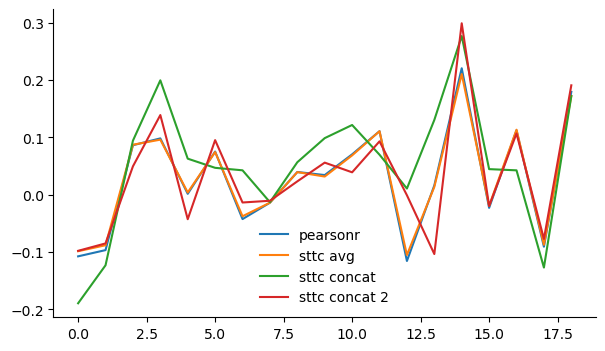

In [40]:
fig, axes = plt.subplots(1,1, figsize=(7, 4))

axes.plot(pearson_avg_acf_l[0][1:], label='pearsonr')
axes.plot(sttc_avg_acf_l[0][1:], label='sttc avg')
axes.plot(sttc_concat_acf_l[0][1:], label='sttc concat')
axes.plot(sttc_concat_acf_v2_l[0][1:], label='sttc concat 2')

axes.legend(frameon=False)
sns.despine()

In [ ]:
sns.heatmap(pearson_avg_acf_matrix_l[0])

In [ ]:
sns.heatmap(sttc_avg_acf_matrix_l[0])